# Application of Neural Network 01

### Contents

- 선형회귀
- 경사하강법
- 손실함수
- 선형회귀를 위한 뉴런
- Summary

### 선형회귀
- 1차 선형회귀

- 데이터
- 공부한 시간과 점수에 대한 상관관계를 예측
- 4시간을 공부한다면 몇 점이 나올까?

# [선형회귀 torch 사용]



In [ ]:
# 도구 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

# [선형회귀 torch.nn.Module 사용]

In [ ]:
# 도구 임포트 및 시드 고정
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
# to do
model = nn.Linear(1,1)

print(list(model.parameters()))

# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    # to do
    prediction = model(x_train)

    # cost 계산
    # to do
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    # to do
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    # to do
    cost.backward() # backward 연산
    # W와 b를 업데이트
    # to do
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [ ]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y)

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


# [클래스로 pytorch 선형회귀 모델 구현]

In [ ]:
# 도구 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F

# 랜덤 시드 고정
torch.manual_seed(1)

# 데이터 로드
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 클래스 생성
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self):
        super().__init__()
        # to do
        self.linear = nn.Linear(1, 1)   # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)

# 모델 객체 생성
model = LinearRegressionModel()

# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
# to do
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    # to do
    prediction = model(x_train)

    # cost 계산
    # to do
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    # to do
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    # to do
    cost.backward() # backward 연산
    # W와 b를 업데이트
    # to do
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [ ]:
model(torch.FloatTensor([[3]]))

tensor([[5.9995]], grad_fn=<AddmmBackward0>)

In [ ]:
model(torch.FloatTensor([[4]]))

tensor([[7.9989]], grad_fn=<AddmmBackward0>)

# [다중 선형회귀 torch 사용]

In [ ]:
# 도구 임포트 및 랜덤 시드 고정
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 훈련 데이터 선언
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 가설, 비용 함수, 옵티마이저를 선언한 후 경사 하강법을 1,000회 반복
# optimizer 설정
# to do
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

# 모델 훈련
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # to do
    hypothesis = w1 * x1_train + w2 * x2_train + w3 * x3_train + b

    # cost 계산
    # to do
    cost = torch.mean((hypothesis - y_train)**2)

    # cost로 H(x) 개선
    # to do
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


# [다중 선형회귀 torch.nn.Module 사용]

In [ ]:
# 도구 임포트 및 시드 고정
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터 선언, 3개의 x로부터 하나의 y를 예측
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 선형 회귀 모델 구현
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
# to do
model = nn.Linear(3,1)

print(list(model.parameters()))

# to do
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    # to do
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    # to do
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    # to do
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    # to do
    cost.backward()
    # W와 b를 업데이트
    # to do
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]
Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


In [ ]:
# 3개의 w와 b의 값 최적화 확인
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

# [클래스로 pytorch 다중 선형회귀 모델 구현]

In [ ]:
# 도구 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F

# 랜덤 시드 고정
torch.manual_seed(1)

# 데이터 로드
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 클래스 생성
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # to do
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

# 모델 객체 생성
model = MultivariateLinearRegressionModel()

# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
# to do
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) 

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    # to do
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    # to do
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    # to do
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    # to do
    cost.backward()
    # W와 b를 업데이트
    # to do
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: nan
Epoch  200/2000 Cost: nan
Epoch  300/2000 Cost: nan
Epoch  400/2000 Cost: nan
Epoch  500/2000 Cost: nan
Epoch  600/2000 Cost: nan
Epoch  700/2000 Cost: nan
Epoch  800/2000 Cost: nan
Epoch  900/2000 Cost: nan
Epoch 1000/2000 Cost: nan
Epoch 1100/2000 Cost: nan
Epoch 1200/2000 Cost: nan
Epoch 1300/2000 Cost: nan
Epoch 1400/2000 Cost: nan
Epoch 1500/2000 Cost: nan
Epoch 1600/2000 Cost: nan
Epoch 1700/2000 Cost: nan
Epoch 1800/2000 Cost: nan
Epoch 1900/2000 Cost: nan
Epoch 2000/2000 Cost: nan


In [ ]:
model(torch.FloatTensor([[73, 80, 75]]))

tensor([[151.2305]], grad_fn=<AddmmBackward0>)

# Application of Neural Network 02

### Contents
- 퍼셉트론 (Perceptron)
- 로지스틱 회귀
- Summary

# [퍼셉트론 (Perceptron)]

[1.71 2.25 2.14 1.76 1.99 1.72 1.87 2.   1.92 2.21 2.08 2.22 1.77 1.94
 2.22 1.7  1.86 1.78 2.05 2.26 1.94 1.89 1.95 1.94 1.8  2.27 1.84 2.07
 2.04 1.84 2.1  1.79 2.18 2.25 1.78 2.25 2.19 1.77 2.08 1.8  1.71 2.24
 2.04 1.92 2.1  2.26 1.86 1.83 2.14 2.05 0.97 0.73 0.94 0.61 0.96 0.87
 0.82 0.6  0.88 0.62 0.68 0.71 0.62 0.66 0.87 0.68 0.7  0.79 0.97 0.65
 0.84 0.68 0.78 0.76 0.76 0.9  0.71 0.84 0.93 0.8  0.94 0.71 0.98 0.77
 0.94 0.67 0.9  0.92 0.72 0.83 0.75 0.77 0.66 0.65 0.92 0.66 0.61 0.94
 0.74 0.98]
[10.53888608 11.44358832  9.73978344  8.36961632  9.77314423  9.42864619
 10.70957693  8.52186096 10.8112479  11.24365515  9.96964272  9.26499115
 11.35329791  9.08229405  9.84900175 10.67466982  9.32779993  8.96472634
  8.40796547 11.03151611  9.29215966 10.10232348 11.67051495  9.85447034
 10.3621583  10.76910628  9.45099447 11.83332068  9.08767868  8.59112235
  8.41814195 10.51599572 10.22214321 10.42825712  8.19603626  9.62647436
 11.32784884  9.59374352  9.33251658 10.99573905  9.8

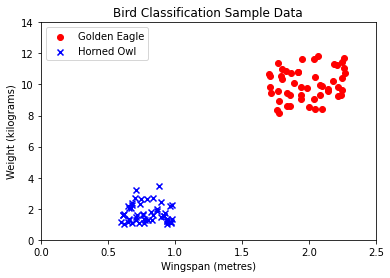

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터셋 생성(날개 길이, 무게에 따른 이동 거리 예측)
bird_wingspans = np.concatenate([np.random.randint(170, 230, size = 50)/100.0, 
                                 np.random.randint(60, 100, size = 50)/100.0])
print(bird_wingspans)

bird_weights = np.concatenate([(11 - 10)*np.random.randn(50)+10, np.abs(np.random.randn(50))+1])
print(bird_weights)

# 길이, 무게 합치기
X = np.vstack((bird_wingspans, bird_weights)).T

# 레이블 생성
y = np.concatenate([np.zeros(50), np.ones(50)])

# shape 확인하기
print("The shape of our input matrix, X, is: {0}.".format(X.shape))
print("The shape of our output vector, y, is: {0}.".format(y.shape))

# 그림 표현
# first 50 samples = Golden Eagle - plot both input features (columns 0 and 1 of X)
plt.scatter(X[:50, 0], X[:50, 1], color='r', marker='o', label='Golden Eagle')
# last 50 samples = Horned Owls
plt.scatter(X[50:, 0], X[50:, 1], color='b', marker='x', label = "Horned Owl")
plt.title("Bird Classification Sample Data")
plt.xlabel("Wingspan (metres)")
plt.ylabel("Weight (kilograms)")
plt.legend(loc = 'upper left')
plt.xlim([0, 2.5])
plt.ylim([0, 14])
plt.show()

[0.5       0.3939    0.8597112]
[ 9.03        4.8302     -0.93919253]
[16.82        8.6881     -3.95408934]
[17.04        8.3426     -7.13261823]
[17.46        8.6715     -6.39492999]
[17.46        8.6715     -6.39492999]
[17.46        8.6715     -6.39492999]
[17.46        8.6715     -6.39492999]
[17.46        8.6715     -6.39492999]
[17.46        8.6715     -6.39492999]


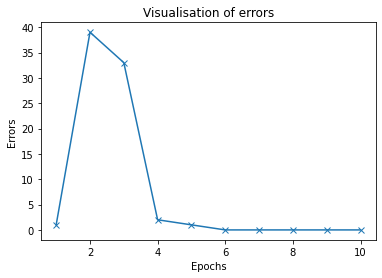

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##퍼셉트론 선언
class Perceptron():
    def __init__(self, input_dim, learning_rate = 0.01, epochs = 10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weight = np.zeros(1+input_dim[1])
        self.errors = []
    #fit
    def fit(self, X, y):
        for i in range(self.epochs):
            error = 0
            for x_i, label in zip(X, y):
                error += label-self.predict(x_i)
                update_value = self.learning_rate * (error)
                self.weight[1:] = self.weight[1:] + update_value * x_i
                self.weight[0] = self.weight[0] + update_value
            print(self.weight)
            self.errors.append(error)
        return self
    
    def forward(self, X):
      return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        return np.where(self.forward(X) > 0, 1, 0)

    
# create a perceptron model and train on our data
model = Perceptron(input_dim = X.shape)
model.fit(X, y)

# plot our misclassification error after each iteration of training
plt.plot(range(1, len(model.errors) + 1), model.errors, marker = 'x')
plt.title("Visualisation of errors")
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

# [로지스틱 회귀 torch 사용]

In [ ]:
# 도구 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 지정
torch.manual_seed(1)

# 데이터셋 텐서로 선언
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

# 학습 실행
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    # cost = -(y_train * torch.log(hypothesis) + 
    #          (1 - y_train) * torch.log(1 - hypothesis)).mean()
    cost = F.binary_cross_entropy(hypothesis, y_train) # 파이토치에서 제공하는 로지스틱 회귀 비용 함수


    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
# 훈련 데이터를 그대로 입력으로 사용했을 때 예측 값 확인
hypothesis = torch.sigmoid(x_train.dot(W) + b)
print(hypothesis)

In [ ]:
# 0.5를 넘으면 True, 넘지 않으면 False로 값을 정하여 출력
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

In [ ]:
# 훈련이 끝난 상태의 W와 b의 값 출력
print(W)
print(b)

# [로지스틱 회귀 torch.nn.Module 사용]

In [ ]:
# 도구 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 지정
torch.manual_seed(1)

# 훈련 데이터 텐서로 선언
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# nn.Sequential()을 사용해 로지스틱 회귀 구현
# to do
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)
# 경사 하강법을 사용해 훈련
# optimizer 설정, lr=1
# to do
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # to do
    hypothesis = model(x_train)

    # cost 계산
    # to do
    cost = F.binary_cross_entropy(hypothesis, y_train)
    #cost = F.mse_loss(hypothesis, y_train)

    # cost로 H(x) 개선
    # to do
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.178059 Accuracy 83.33%
Epoch   10/1000 Cost: 0.146749 Accuracy 83.33%
Epoch   20/1000 Cost: 0.131545 Accuracy 83.33%
Epoch   30/1000 Cost: 0.119427 Accuracy 83.33%
Epoch   40/1000 Cost: 0.108303 Accuracy 83.33%
Epoch   50/1000 Cost: 0.098214 Accuracy 83.33%
Epoch   60/1000 Cost: 0.089265 Accuracy 83.33%
Epoch   70/1000 Cost: 0.081434 Accuracy 100.00%
Epoch   80/1000 Cost: 0.074620 Accuracy 100.00%
Epoch   90/1000 Cost: 0.068696 Accuracy 100.00%
Epoch  100/1000 Cost: 0.063533 Accuracy 100.00%
Epoch  110/1000 Cost: 0.059016 Accuracy 100.00%
Epoch  120/1000 Cost: 0.055046 Accuracy 100.00%
Epoch  130/1000 Cost: 0.051540 Accuracy 100.00%
Epoch  140/1000 Cost: 0.048426 Accuracy 100.00%
Epoch  150/1000 Cost: 0.045646 Accuracy 100.00%
Epoch  160/1000 Cost: 0.043153 Accuracy 100.00%
Epoch  170/1000 Cost: 0.040906 Accuracy 100.00%
Epoch  180/1000 Cost: 0.038872 Accuracy 100.00%
Epoch  190/1000 Cost: 0.037023 Accuracy 100.00%
Epoch  200/1000 Cost: 0.035335 Accuracy 100.00%

In [ ]:
# 기존 훈련 데이터를 입력해 예측값 확인
model(x_train)

In [ ]:
print(list(model.parameters()))

# [클래스로 pytorch 로지스틱 회귀 모델 구현]

In [ ]:
# 도구 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 지정
torch.manual_seed(1)

# 데이터 로딩
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 클래스로 모델 생성
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        # to do
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

# 모델 객체 생성
model = BinaryClassifier()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # to do
    hypothesis = model(x_train)

    # cost 계산
    # to do
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    # to do
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/2000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/2000 Cost: 0.510919 Accuracy 83.33%
Epoch   20/2000 Cost: 0.490904 Accuracy 83.33%
Epoch   30/2000 Cost: 0.475095 Accuracy 83.33%
Epoch   40/2000 Cost: 0.461999 Accuracy 83.33%
Epoch   50/2000 Cost: 0.450719 Accuracy 83.33%
Epoch   60/2000 Cost: 0.440698 Accuracy 83.33%
Epoch   70/2000 Cost: 0.431580 Accuracy 83.33%
Epoch   80/2000 Cost: 0.423135 Accuracy 83.33%
Epoch   90/2000 Cost: 0.415206 Accuracy 83.33%
Epoch  100/2000 Cost: 0.407688 Accuracy 83.33%
Epoch  110/2000 Cost: 0.400507 Accuracy 83.33%
Epoch  120/2000 Cost: 0.393610 Accuracy 83.33%
Epoch  130/2000 Cost: 0.386960 Accuracy 83.33%
Epoch  140/2000 Cost: 0.380529 Accuracy 83.33%
Epoch  150/2000 Cost: 0.374296 Accuracy 83.33%
Epoch  160/2000 Cost: 0.368245 Accuracy 83.33%
Epoch  170/2000 Cost: 0.362364 Accuracy 83.33%
Epoch  180/2000 Cost: 0.356643 Accuracy 83.33%
Epoch  190/2000 Cost: 0.351074 Accuracy 83.33%
Epoch  200/2000 Cost: 0.345649 Accuracy 83.33%
Epoch  210/20

# Application of Neural Network 03

### Contents
- Wisconsin breast cancer dataset
- A neuron for logistic regression
- Logistic Regression with sci-learn
- Summary

# [A Neuron for Logistic Regression]

In [ ]:
%matplotlib inline

# Iris Dataset

# feature 데이터 분포 확인 or feature 이름 확인

In [ ]:
from sklearn import linear_model,datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.target)


(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.30,random_state=7)
log_reg_model = linear_model.LogisticRegression()
log_reg_model.fit(X_train,y_train)
log_reg_base_score = log_reg_model.score(X_test,y_test)
print("The score for the Logistic Regression Model is : ", log_reg_base_score)


The score for the Logistic Regression Model is :  0.9111111111111111


In [ ]:
cm = confusion_matrix(y_test,log_reg_model.predict(X_test))
print(cm)

[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


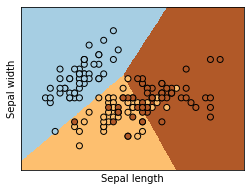

In [ ]:
X = iris.data[:,:2]
y = iris.target

log_reg_model.fit(X,y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

Z = log_reg_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Confusion matrix, without normalization
[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


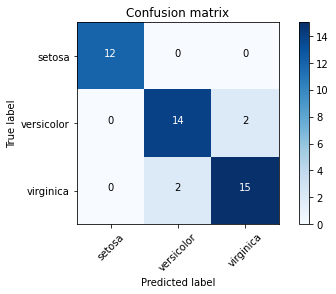

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


log_reg_model.fit(X_train,y_train)
cnf_matrix = confusion_matrix(y_test, log_reg_model.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,
                      title='Confusion matrix')

# MNIST Dataset

In [ ]:
import torch
import torchvision.datasets
import torchvision.transforms
from tqdm import tqdm
import random

In [ ]:
random.seed(777)
torch.manual_seed(777)

training_epochs = 15

In [ ]:
mnist_train = torchvision.datasets.MNIST(root='MNIST_data/', train=True, transform=torchvision.transforms.ToTensor(), download=True)
mnist_test = torchvision.datasets.MNIST(root='MNIST_data/', train=False,transform=torchvision.transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=mnist_train, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_train, shuffle=True, drop_last=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



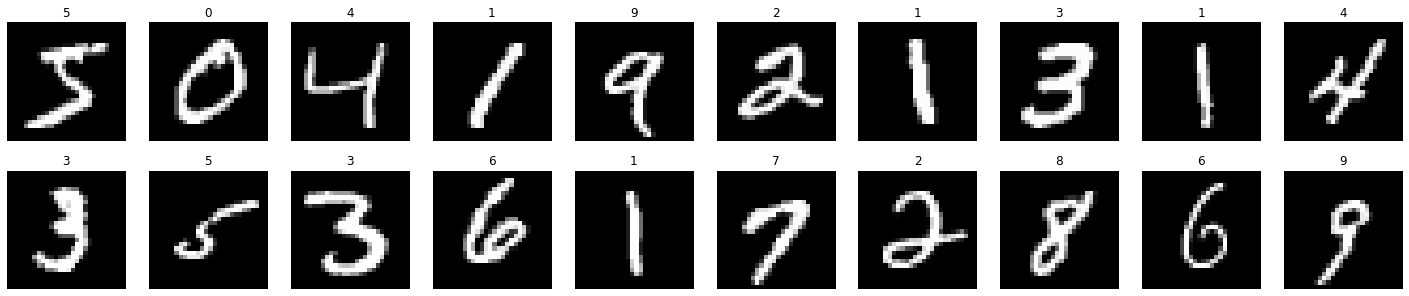

In [ ]:
images = mnist_train.data[0:20]
labels = mnist_train.targets[0:20].numpy()

fig = plt.figure(figsize=(25,5))
for i in range(len(images)):
    ax = fig.add_subplot(2, 20/2, i+1)
    ax.imshow(images[i].view(28,28),cmap='gray')
    ax.set_title(labels[i])
    ax.axis('off')

In [ ]:
class Classifier(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim,device, output_dim, lr = 0.001, epochs = 5):
        super(Classifier, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.losses = []
        self.lr = lr
        self.device = device
        
        self.fc1 = torch.nn.Linear(self.input_dim, self.hidden_dim[0]).to(self.device)
        self.fc2 = torch.nn.Linear(self.hidden_dim[0], self.hidden_dim[1]).to(self.device)
        self.fc3 = torch.nn.Linear(self.hidden_dim[1], self.output_dim).to(self.device)

        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        pred = torch.sigmoid(self.fc1(x))
        pred = torch.sigmoid(self.fc2(pred))
        pred = self.fc3(pred)
        
        
        return pred

    #TODO
    def fit(self, data):
        criterion = torch.nn.CrossEntropyLoss().to(self.device)
        optimizer = torch.optim.SGD(self.parameters(), lr = self.lr)
        for _ in range(self.epochs):
            total_loss=0
            for x, y in tqdm(data):
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                optimizer.zero_grad()

                pred = self.forward(x)

                loss = criterion(pred, y)
                loss.backward()
                optimizer.step()
                total_loss+=loss.item()
            print('Epoch {} Loss: '.format(_+1),total_loss/len(data))
            self.losses.append(total_loss/len(data))

    def evaluation(self,x,y):
        with torch.no_grad():
            pred = self.forward(x)
            correct_pred = torch.argmax(pred,1) == y
            accuracy = correct_pred.float().mean()
            print('Accuracy', accuracy.item())



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Classifier(input_dim = 784, hidden_dim=(256, 128), output_dim=10,device=device)
model.fit(train_loader)

100%|██████████| 60000/60000 [01:21<00:00, 739.05it/s]


Epoch 1 Loss:  1.4768558027064427


100%|██████████| 60000/60000 [01:21<00:00, 738.31it/s]


Epoch 2 Loss:  0.544953371536724


100%|██████████| 60000/60000 [01:16<00:00, 789.37it/s]


Epoch 3 Loss:  0.3976049149513332


100%|██████████| 60000/60000 [01:19<00:00, 751.84it/s]


Epoch 4 Loss:  0.348686774181757


100%|██████████| 60000/60000 [01:12<00:00, 827.37it/s]

Epoch 5 Loss:  0.3224791505024206


In [ ]:
test_x = mnist_test.data.view(-1,784).float().to(device)
test_y = mnist_test.targets.to(device)
model.evaluation(test_x,test_y)

Accuracy 0.8985999822616577


Text(0, 0.5, 'loss')

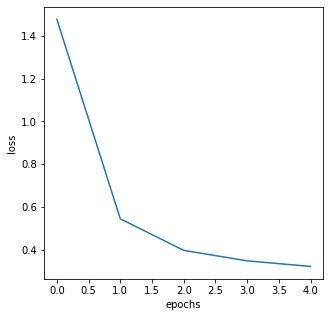

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(model.losses)
plt.xlabel('epochs')
plt.ylabel('loss')

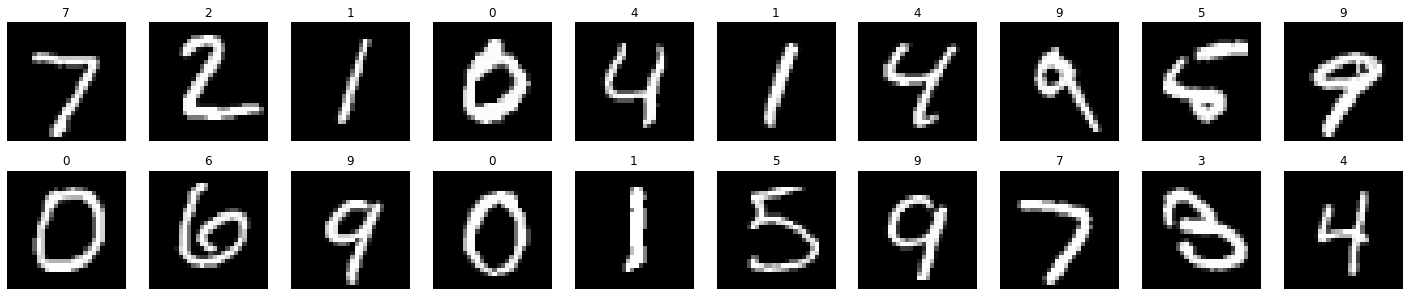

In [ ]:
example_test = mnist_test.data[0:20]
example_test_label = mnist_test.targets[0:20].numpy()

fig = plt.figure(figsize=(25,5))
for i in range(len(example_test)):
    ax = fig.add_subplot(2, 20/2, i+1)
    ax.imshow(example_test[i].view(28,28),cmap='gray')
    ax.set_title(example_test_label[i])
    ax.axis('off')

In [ ]:
pred = model.forward(example_test.view(-1,784).float().to(device))
pred = torch.argmax(pred,1)

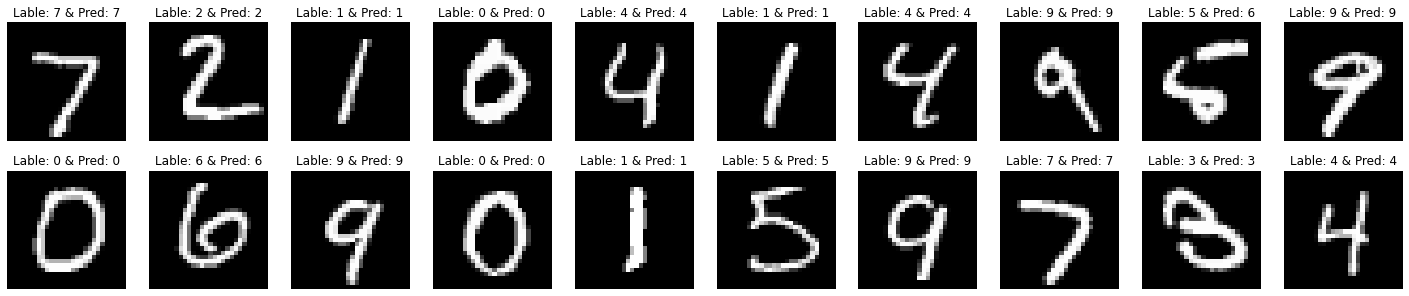

In [ ]:
fig = plt.figure(figsize=(25,5))
for i in range(len(example_test)):
    ax = fig.add_subplot(2, 20/2, i+1)
    ax.imshow(example_test[i].view(28,28),cmap='gray')
    ax.set_title("Lable: {} & Pred: {}".format(example_test_label[i], pred.cpu().numpy()[i]))
    ax.axis("off")